# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:05:48.962901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:05:51.870410
2025-04-14 19:05:51.870410


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:05:47"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

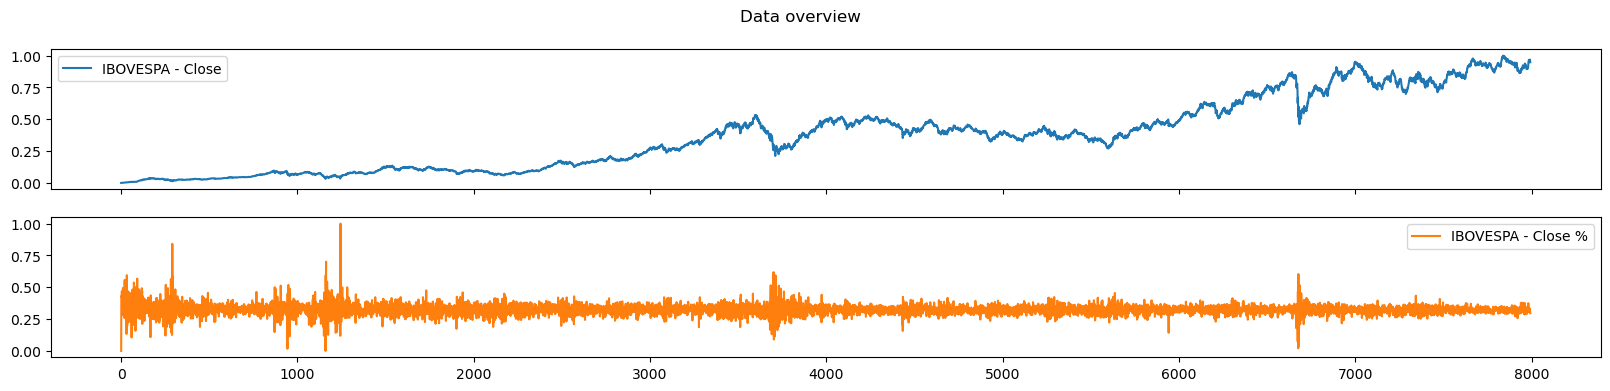

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

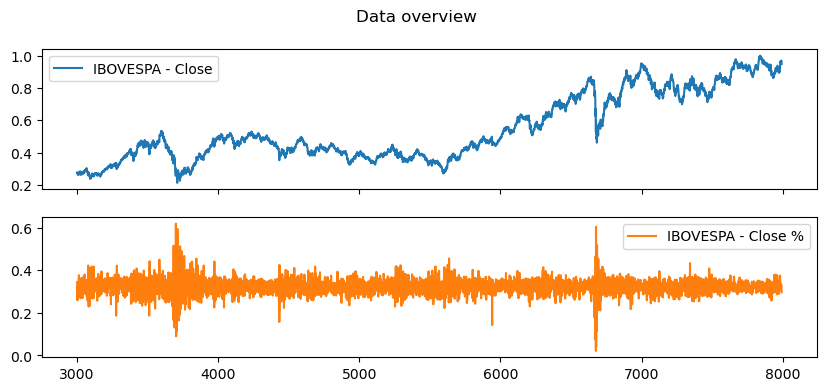

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

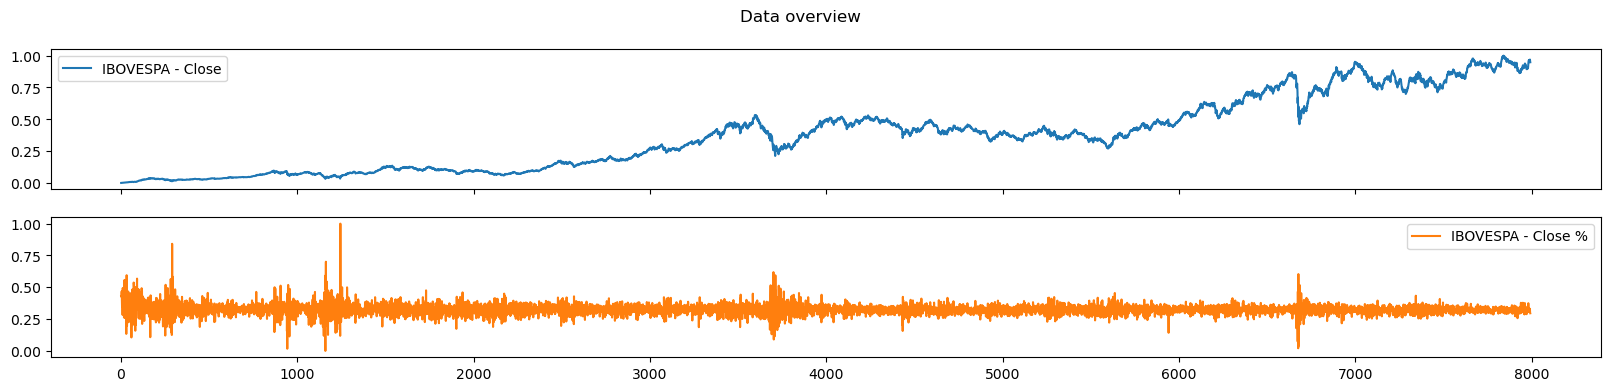

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

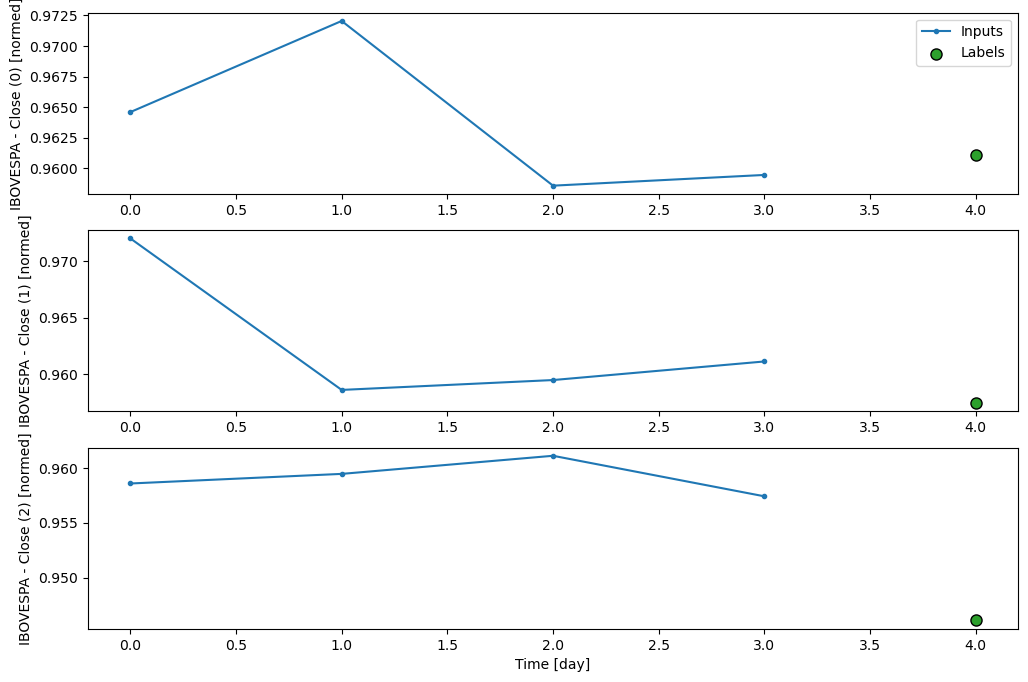

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14:55 4s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.1939 - mean_squared_error: 6.6327e-05 - root_mean_squared_error: 0.0077   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 55.3897 - mean_squared_error: 8.3782e-05 - root_mean_squared_error: 0.0089

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 48.3814 - mean_squared_error: 8.2933e-05 - root_mean_squared_error: 0.0089

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 43.5488 - mean_squared_error: 8.7801e-05 - root_mean_squared_error: 0.0092

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.2934 - mean_squared_error: 1.0468e-04 - root_mean_squared_error: 0.0100

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.9305 - mean_squared_error: 1.3385e-04 - root_mean_squared_error: 0.0111

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.1181 - mean_squared_error: 1.5226e-04 - root_mean_squared_error: 0.0118

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 34.7213 - mean_squared_error: 1.6943e-04 - root_mean_squared_error: 0.0125

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 33.5802 - mean_squared_error: 2.0955e-04 - root_mean_squared_error: 0.0137

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 32.5265 - mean_squared_error: 2.4343e-04 - root_mean_squared_error: 0.0146

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 31.6002 - mean_squared_error: 2.9318e-04 - root_mean_squared_error: 0.0159

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 30.8878 - mean_squared_error: 3.7389e-04 - root_mean_squared_error: 0.0175

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 30.2269 - mean_squared_error: 4.9713e-04 - root_mean_squared_error: 0.0196

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 29.7497 - mean_squared_error: 6.8629e-04 - root_mean_squared_error: 0.0221

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 29.3083 - mean_squared_error: 8.7158e-04 - root_mean_squared_error: 0.0245

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 28.8801 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0266    

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 28.4149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0287

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 28.0199 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 27.6436 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 27.2886 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 26.9529 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.6282 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 26.3336 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 26.0860 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0385

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 25.8087 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0399


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 25.6248 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0408 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_mean_absolute_percentage_error: 9.8137 - val_mean_squared_error: 0.0099 - val_root_mean_squared_error: 0.0995


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8119 - mean_absolute_error: 0.8119 - mean_absolute_percentage_error: 35002.7188 - mean_squared_error: 0.6592 - root_mean_squared_error: 0.8119

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7846 - mean_absolute_error: 0.7846 - mean_absolute_percentage_error: 14742.5771 - mean_squared_error: 0.6181 - root_mean_squared_error: 0.7857 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6782 - mean_absolute_error: 0.6782 - mean_absolute_percentage_error: 10269.3994 - mean_squared_error: 0.5094 - root_mean_squared_error: 0.7077

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5683 - mean_absolute_error: 0.5683 - mean_absolute_percentage_error: 7848.2334 - mean_squared_error: 0.4151 - root_mean_squared_error: 0.6309 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4976 - mean_absolute_error: 0.4976 - mean_absolute_percentage_error: 6543.8252 - mean_squared_error: 0.3569 - root_mean_squared_error: 0.5788

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 5646.3506 - mean_squared_error: 0.3142 - root_mean_squared_error: 0.5380

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 4985.9512 - mean_squared_error: 0.2815 - root_mean_squared_error: 0.5050

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - mean_absolute_percentage_error: 4427.8052 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4748

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 4032.2371 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4520

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 3707.9990 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4324

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 3464.7148 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4170

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 3206.1199 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.3999

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 3007.3145 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3863

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 2834.0610 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3742

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 2681.6438 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3634

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 2546.2930 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3535

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 2425.2271 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3445

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 2316.2092 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3361

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 2217.4666 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3284

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 2127.5708 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3212

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 2045.3586 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3145

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 1969.8677 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3082

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 1900.2860 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3024

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 1829.0541 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.2964

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 1769.7958 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2914

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 1714.6121 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.2867


Epoch: 2 - LR: 0.009510851465165615


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 1657.5730 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2818 - val_loss: 0.1495 - val_mean_absolute_error: 0.1495 - val_mean_absolute_percentage_error: 16.0188 - val_mean_squared_error: 0.0238 - val_root_mean_squared_error: 0.1542


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6080 - mean_absolute_error: 0.6080 - mean_absolute_percentage_error: 26212.7773 - mean_squared_error: 0.3697 - root_mean_squared_error: 0.6080

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5813 - mean_absolute_error: 0.5813 - mean_absolute_percentage_error: 10986.9580 - mean_squared_error: 0.3392 - root_mean_squared_error: 0.5820 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5068 - mean_absolute_error: 0.5068 - mean_absolute_percentage_error: 7462.4043 - mean_squared_error: 0.2793 - root_mean_squared_error: 0.5243 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 5904.8882 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4755

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 4846.0249 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4337

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 4198.4790 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.4042

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 3765.5205 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3826

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 3383.5459 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3621

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 3078.9502 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3447

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 2829.7566 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3297

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 2621.6536 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3166

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 2444.9319 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3051

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 2292.7422 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2948

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 2146.5498 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2847

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 2031.6908 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2768

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1929.6686 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2696

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 1838.3953 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2630

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 1747.5443 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2562

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 1673.8459 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2506

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 1606.6971 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2454

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 1545.2488 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2405

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 1482.7963 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2355

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1431.1624 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2313

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 1378.2493 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2269

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1334.1873 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2233

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1293.1199 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2198


Epoch: 3 - LR: 0.009275324642658234


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1258.8899 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2169 - val_loss: 0.1589 - val_mean_absolute_error: 0.1589 - val_mean_absolute_percentage_error: 17.0344 - val_mean_squared_error: 0.0268 - val_root_mean_squared_error: 0.1636


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7622 - mean_absolute_error: 0.7622 - mean_absolute_percentage_error: 32857.6250 - mean_squared_error: 0.5810 - root_mean_squared_error: 0.7622

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7383 - mean_absolute_error: 0.7383 - mean_absolute_percentage_error: 13813.9404 - mean_squared_error: 0.5459 - root_mean_squared_error: 0.7386 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7030 - mean_absolute_error: 0.7030 - mean_absolute_percentage_error: 9598.4062 - mean_squared_error: 0.4986 - root_mean_squared_error: 0.7050 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - mean_absolute_percentage_error: 7765.1064 - mean_squared_error: 0.4522 - root_mean_squared_error: 0.6695

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6163 - mean_absolute_error: 0.6163 - mean_absolute_percentage_error: 6582.2324 - mean_squared_error: 0.4081 - root_mean_squared_error: 0.6330

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5666 - mean_absolute_error: 0.5666 - mean_absolute_percentage_error: 5665.2871 - mean_squared_error: 0.3666 - root_mean_squared_error: 0.5963

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5285 - mean_absolute_error: 0.5285 - mean_absolute_percentage_error: 5055.1855 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5677

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 4529.6284 - mean_squared_error: 0.3077 - root_mean_squared_error: 0.5401

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4631 - mean_absolute_error: 0.4631 - mean_absolute_percentage_error: 4151.4951 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5184

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4382 - mean_absolute_error: 0.4382 - mean_absolute_percentage_error: 3838.2090 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4992

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 3573.6392 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4821

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 3346.8311 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4666

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 3170.5747 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4541

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 2995.5662 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4413

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 2840.9744 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4298

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 2688.7549 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4181

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 2566.4802 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4084

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 2455.9580 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3994

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 2355.5149 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3909

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 2283.4795 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3847

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 2197.7568 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3772

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 2118.9033 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3702

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 2046.0970 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3636

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1978.6309 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3574

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1915.9304 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3516

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1857.4771 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3461

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1802.8394 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3408


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1785.4235 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3391 - val_loss: 0.1582 - val_mean_absolute_error: 0.1582 - val_mean_absolute_percentage_error: 16.9591 - val_mean_squared_error: 0.0265 - val_root_mean_squared_error: 0.1629


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7632 - mean_absolute_error: 0.7632 - mean_absolute_percentage_error: 32899.1562 - mean_squared_error: 0.5824 - root_mean_squared_error: 0.7632

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_absolute_percentage_error: 13825.0244 - mean_squared_error: 0.5462 - root_mean_squared_error: 0.7389 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7093 - mean_absolute_error: 0.7093 - mean_absolute_percentage_error: 9886.4561 - mean_squared_error: 0.5064 - root_mean_squared_error: 0.7108 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6690 - mean_absolute_error: 0.6690 - mean_absolute_percentage_error: 7787.6084 - mean_squared_error: 0.4585 - root_mean_squared_error: 0.6745

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6275 - mean_absolute_error: 0.6275 - mean_absolute_percentage_error: 6611.2954 - mean_squared_error: 0.4166 - root_mean_squared_error: 0.6404

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5807 - mean_absolute_error: 0.5807 - mean_absolute_percentage_error: 5698.3516 - mean_squared_error: 0.3761 - root_mean_squared_error: 0.6051

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5431 - mean_absolute_error: 0.5431 - mean_absolute_percentage_error: 5088.8096 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5771

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5097 - mean_absolute_error: 0.5097 - mean_absolute_percentage_error: 4609.7490 - mean_squared_error: 0.3198 - root_mean_squared_error: 0.5523

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - mean_absolute_percentage_error: 4222.3315 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5304

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4549 - mean_absolute_error: 0.4549 - mean_absolute_percentage_error: 3901.8252 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5110

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 3631.5662 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4936

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 3376.3555 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4763

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 3178.6023 - mean_squared_error: 0.2342 - root_mean_squared_error: 0.4622

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 2987.2202 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4482

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 2835.7517 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4367

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 2700.4568 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4261

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 2578.8162 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4163

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 2457.1802 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4062

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 2358.1047 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3978

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 2267.5190 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3899

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 2184.3523 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3824

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 2099.5632 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3748

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 2021.7795 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3676

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1957.0496 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3615

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1890.3086 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3552

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1834.4069 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3498


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1804.9182 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3469 - val_loss: 0.1476 - val_mean_absolute_error: 0.1476 - val_mean_absolute_percentage_error: 15.8063 - val_mean_squared_error: 0.0233 - val_root_mean_squared_error: 0.1526


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7739 - mean_absolute_error: 0.7739 - mean_absolute_percentage_error: 33359.6367 - mean_squared_error: 0.5989 - root_mean_squared_error: 0.7739

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7490 - mean_absolute_error: 0.7490 - mean_absolute_percentage_error: 14017.6572 - mean_squared_error: 0.5617 - root_mean_squared_error: 0.7493 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7207 - mean_absolute_error: 0.7207 - mean_absolute_percentage_error: 10029.3076 - mean_squared_error: 0.5225 - root_mean_squared_error: 0.7220

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6907 - mean_absolute_error: 0.6907 - mean_absolute_percentage_error: 8243.2920 - mean_squared_error: 0.4850 - root_mean_squared_error: 0.6945 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6520 - mean_absolute_error: 0.6520 - mean_absolute_percentage_error: 6945.8184 - mean_squared_error: 0.4430 - root_mean_squared_error: 0.6615

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6114 - mean_absolute_error: 0.6114 - mean_absolute_percentage_error: 6042.3203 - mean_squared_error: 0.4049 - root_mean_squared_error: 0.6296

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - mean_absolute_percentage_error: 5368.7466 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.6006

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5383 - mean_absolute_error: 0.5383 - mean_absolute_percentage_error: 4845.1162 - mean_squared_error: 0.3441 - root_mean_squared_error: 0.5749

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5074 - mean_absolute_error: 0.5074 - mean_absolute_percentage_error: 4424.6279 - mean_squared_error: 0.3203 - root_mean_squared_error: 0.5519

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4801 - mean_absolute_error: 0.4801 - mean_absolute_percentage_error: 4078.8162 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5315

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4562 - mean_absolute_error: 0.4562 - mean_absolute_percentage_error: 3788.8325 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5133

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 3541.4905 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4968

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 3305.7334 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4803

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3964 - mean_absolute_error: 0.3964 - mean_absolute_percentage_error: 3121.6355 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4669

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 2959.2043 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4548

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 2814.5654 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4436

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 2671.2661 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4321

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 2543.3210 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4215

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 2439.2710 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4127

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 2344.2637 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4044

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 2257.1428 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3966

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 2176.9431 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3893

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 2102.8455 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3825

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 2034.1476 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3761

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1970.2593 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3700

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1904.2915 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3637


Epoch: 6 - LR: 0.008603165857493877


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1843.0503 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3577 - val_loss: 0.1406 - val_mean_absolute_error: 0.1406 - val_mean_absolute_percentage_error: 15.0536 - val_mean_squared_error: 0.0213 - val_root_mean_squared_error: 0.1459


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7802 - mean_absolute_error: 0.7802 - mean_absolute_percentage_error: 33631.5234 - mean_squared_error: 0.6087 - root_mean_squared_error: 0.7802

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7576 - mean_absolute_error: 0.7576 - mean_absolute_percentage_error: 14145.6553 - mean_squared_error: 0.5746 - root_mean_squared_error: 0.7579 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7317 - mean_absolute_error: 0.7317 - mean_absolute_percentage_error: 10133.1250 - mean_squared_error: 0.5380 - root_mean_squared_error: 0.7328

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6999 - mean_absolute_error: 0.6999 - mean_absolute_percentage_error: 8164.4790 - mean_squared_error: 0.4976 - root_mean_squared_error: 0.7036 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6632 - mean_absolute_error: 0.6632 - mean_absolute_percentage_error: 6916.7437 - mean_squared_error: 0.4568 - root_mean_squared_error: 0.6720

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6247 - mean_absolute_error: 0.6247 - mean_absolute_percentage_error: 6040.4663 - mean_squared_error: 0.4194 - root_mean_squared_error: 0.6414

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5871 - mean_absolute_error: 0.5871 - mean_absolute_percentage_error: 5382.1011 - mean_squared_error: 0.3866 - root_mean_squared_error: 0.6130

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5530 - mean_absolute_error: 0.5530 - mean_absolute_percentage_error: 4867.2695 - mean_squared_error: 0.3586 - root_mean_squared_error: 0.5876

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - mean_absolute_percentage_error: 4452.0459 - mean_squared_error: 0.3344 - root_mean_squared_error: 0.5649

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - mean_absolute_percentage_error: 4109.3989 - mean_squared_error: 0.3135 - root_mean_squared_error: 0.5445

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4702 - mean_absolute_error: 0.4702 - mean_absolute_percentage_error: 3821.2080 - mean_squared_error: 0.2953 - root_mean_squared_error: 0.5263

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 3574.8606 - mean_squared_error: 0.2793 - root_mean_squared_error: 0.5097

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 3361.5742 - mean_squared_error: 0.2651 - root_mean_squared_error: 0.4947

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4111 - mean_absolute_error: 0.4111 - mean_absolute_percentage_error: 3174.9553 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4810

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3957 - mean_absolute_error: 0.3957 - mean_absolute_percentage_error: 3010.2410 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4686

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 2863.5249 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4571

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 2745.8726 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4477

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 2638.5225 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4388

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 2516.7756 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4285

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 2417.4033 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4198

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 2326.3872 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4117

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3185 - mean_absolute_error: 0.3185 - mean_absolute_percentage_error: 2242.6907 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4040

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 2173.7341 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3976

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 2101.5869 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3908

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 2034.5741 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3845

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1972.1383 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3784

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1913.8064 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3727


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1877.0115 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3690 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392 - val_mean_absolute_percentage_error: 14.8971 - val_mean_squared_error: 0.0209 - val_root_mean_squared_error: 0.1445


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7818 - mean_absolute_error: 0.7818 - mean_absolute_percentage_error: 33700.0703 - mean_squared_error: 0.6112 - root_mean_squared_error: 0.7818

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_absolute_percentage_error: 14176.8047 - mean_squared_error: 0.5777 - root_mean_squared_error: 0.7599 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7315 - mean_absolute_error: 0.7315 - mean_absolute_percentage_error: 9881.9326 - mean_squared_error: 0.5378 - root_mean_squared_error: 0.7327 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7002 - mean_absolute_error: 0.7002 - mean_absolute_percentage_error: 8024.5508 - mean_squared_error: 0.4982 - root_mean_squared_error: 0.7040

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6645 - mean_absolute_error: 0.6645 - mean_absolute_percentage_error: 6829.5259 - mean_squared_error: 0.4585 - root_mean_squared_error: 0.6733

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6272 - mean_absolute_error: 0.6272 - mean_absolute_percentage_error: 5983.1899 - mean_squared_error: 0.4220 - root_mean_squared_error: 0.6434

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5904 - mean_absolute_error: 0.5904 - mean_absolute_percentage_error: 5343.1387 - mean_squared_error: 0.3898 - root_mean_squared_error: 0.6157

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5529 - mean_absolute_error: 0.5529 - mean_absolute_percentage_error: 4790.6714 - mean_squared_error: 0.3592 - root_mean_squared_error: 0.5881

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 4392.3726 - mean_squared_error: 0.3357 - root_mean_squared_error: 0.5659

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4954 - mean_absolute_error: 0.4954 - mean_absolute_percentage_error: 4062.0869 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5461

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4713 - mean_absolute_error: 0.4713 - mean_absolute_percentage_error: 3783.0859 - mean_squared_error: 0.2973 - root_mean_squared_error: 0.5281

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 3519.3059 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5102

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 3336.1035 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.4971

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - mean_absolute_percentage_error: 3153.9631 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4836

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 2992.8511 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4714

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 2849.0769 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4600

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 2719.9177 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4495

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3590 - mean_absolute_error: 0.3590 - mean_absolute_percentage_error: 2603.1614 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4398

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 2497.0364 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4306

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 2400.1099 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4221

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 2311.2078 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4140

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 2229.3486 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4065

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 2153.7039 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3994

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 2091.1028 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3935

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 2032.4207 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3878

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1970.6211 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3818

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1912.8472 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3761


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1888.3734 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3736 - val_loss: 0.1316 - val_mean_absolute_error: 0.1316 - val_mean_absolute_percentage_error: 14.0728 - val_mean_squared_error: 0.0188 - val_root_mean_squared_error: 0.1372


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7893 - mean_absolute_error: 0.7893 - mean_absolute_percentage_error: 34026.8281 - mean_squared_error: 0.6231 - root_mean_squared_error: 0.7894

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7672 - mean_absolute_error: 0.7672 - mean_absolute_percentage_error: 14314.4785 - mean_squared_error: 0.5891 - root_mean_squared_error: 0.7674 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7425 - mean_absolute_error: 0.7425 - mean_absolute_percentage_error: 10260.4668 - mean_squared_error: 0.5537 - root_mean_squared_error: 0.7435

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_absolute_percentage_error: 8273.8643 - mean_squared_error: 0.5146 - root_mean_squared_error: 0.7157 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6780 - mean_absolute_error: 0.6780 - mean_absolute_percentage_error: 7015.4561 - mean_squared_error: 0.4747 - root_mean_squared_error: 0.6856

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6419 - mean_absolute_error: 0.6419 - mean_absolute_percentage_error: 6133.0591 - mean_squared_error: 0.4377 - root_mean_squared_error: 0.6560

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_absolute_percentage_error: 5468.7422 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.6281

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5702 - mean_absolute_error: 0.5702 - mean_absolute_percentage_error: 4947.9180 - mean_squared_error: 0.3760 - root_mean_squared_error: 0.6027

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5385 - mean_absolute_error: 0.5385 - mean_absolute_percentage_error: 4527.4497 - mean_squared_error: 0.3511 - root_mean_squared_error: 0.5799

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5075 - mean_absolute_error: 0.5075 - mean_absolute_percentage_error: 4145.2778 - mean_squared_error: 0.3273 - root_mean_squared_error: 0.5572

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4827 - mean_absolute_error: 0.4827 - mean_absolute_percentage_error: 3858.2302 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5389

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 3612.3826 - mean_squared_error: 0.2923 - root_mean_squared_error: 0.5223

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4403 - mean_absolute_error: 0.4403 - mean_absolute_percentage_error: 3399.1865 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5072

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 3212.3955 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4935

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 3047.3157 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4809

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 2900.1091 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4693

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 2767.9446 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4586

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 2648.5432 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4486

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3557 - mean_absolute_error: 0.3557 - mean_absolute_percentage_error: 2540.0662 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4393

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 2451.6128 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4314

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 2369.7588 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4241

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 2284.6550 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4162

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 2206.1021 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4089

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 2125.5830 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4013

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 2058.5042 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3948

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 2009.4921 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3900

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1989.2712 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3880

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1976.0400 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3867

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1937.4911 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3829


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1912.7209 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3804 - val_loss: 0.0610 - val_mean_absolute_error: 0.0610 - val_mean_absolute_percentage_error: 6.4917 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0671


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.7972 - mean_absolute_error: 0.7972 - mean_absolute_percentage_error: 34367.0273 - mean_squared_error: 0.6356 - root_mean_squared_error: 0.7972

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7888 - mean_absolute_error: 0.7888 - mean_absolute_percentage_error: 18659.4941 - mean_squared_error: 0.6223 - root_mean_squared_error: 0.7889 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7779 - mean_absolute_error: 0.7779 - mean_absolute_percentage_error: 13807.1865 - mean_squared_error: 0.6057 - root_mean_squared_error: 0.7781

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7618 - mean_absolute_error: 0.7618 - mean_absolute_percentage_error: 10707.7236 - mean_squared_error: 0.5818 - root_mean_squared_error: 0.7624

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7422 - mean_absolute_error: 0.7422 - mean_absolute_percentage_error: 8961.0811 - mean_squared_error: 0.5547 - root_mean_squared_error: 0.7439  

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 7779.5498 - mean_squared_error: 0.5248 - root_mean_squared_error: 0.7226

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6968 - mean_absolute_error: 0.6968 - mean_absolute_percentage_error: 7131.8154 - mean_squared_error: 0.5019 - root_mean_squared_error: 0.7055

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6779 - mean_absolute_error: 0.6779 - mean_absolute_percentage_error: 6695.6890 - mean_squared_error: 0.4837 - root_mean_squared_error: 0.6914

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6451 - mean_absolute_error: 0.6451 - mean_absolute_percentage_error: 6062.3823 - mean_squared_error: 0.4538 - root_mean_squared_error: 0.6675

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - mean_absolute_percentage_error: 5550.6851 - mean_squared_error: 0.4267 - root_mean_squared_error: 0.6451 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5846 - mean_absolute_error: 0.5846 - mean_absolute_percentage_error: 5127.5767 - mean_squared_error: 0.4026 - root_mean_squared_error: 0.6243

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5579 - mean_absolute_error: 0.5579 - mean_absolute_percentage_error: 4771.1899 - mean_squared_error: 0.3810 - root_mean_squared_error: 0.6052

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5334 - mean_absolute_error: 0.5334 - mean_absolute_percentage_error: 4466.4932 - mean_squared_error: 0.3618 - root_mean_squared_error: 0.5877

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5143 - mean_absolute_error: 0.5143 - mean_absolute_percentage_error: 4238.1240 - mean_squared_error: 0.3469 - root_mean_squared_error: 0.5738

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4909 - mean_absolute_error: 0.4909 - mean_absolute_percentage_error: 3971.4841 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5567

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4724 - mean_absolute_error: 0.4724 - mean_absolute_percentage_error: 3767.1641 - mean_squared_error: 0.3149 - root_mean_squared_error: 0.5429

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 3560.6750 - mean_squared_error: 0.3004 - root_mean_squared_error: 0.5284

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4356 - mean_absolute_error: 0.4356 - mean_absolute_percentage_error: 3378.0110 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5150

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 3234.5601 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.5041

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4073 - mean_absolute_error: 0.4073 - mean_absolute_percentage_error: 3086.4597 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.4926

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 2952.7659 - mean_squared_error: 0.2559 - root_mean_squared_error: 0.4819

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 2845.9680 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4732

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 2774.8220 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4672

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 2681.6282 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4593

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 2619.2151 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4539

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 2537.0781 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4466

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3432 - mean_absolute_error: 0.3432 - mean_absolute_percentage_error: 2449.9497 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4388

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 2369.2395 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4314

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 2312.5027 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4261

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 2241.4006 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4194

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 2174.9883 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4130

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 2112.8042 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4069

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 2054.4453 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4011

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 2006.2366 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3963

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1947.8138 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3903


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1935.3558 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3891 - val_loss: 0.1240 - val_mean_absolute_error: 0.1240 - val_mean_absolute_percentage_error: 13.2571 - val_mean_squared_error: 0.0168 - val_root_mean_squared_error: 0.1297


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.7939 - mean_absolute_error: 0.7939 - mean_absolute_percentage_error: 34222.0312 - mean_squared_error: 0.6303 - root_mean_squared_error: 0.7939

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7860 - mean_absolute_error: 0.7860 - mean_absolute_percentage_error: 17264.9199 - mean_squared_error: 0.6180 - root_mean_squared_error: 0.7861  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7627 - mean_absolute_error: 0.7627 - mean_absolute_percentage_error: 11729.0312 - mean_squared_error: 0.5835 - root_mean_squared_error: 0.7635

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7329 - mean_absolute_error: 0.7329 - mean_absolute_percentage_error: 9534.4746 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7362 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6895 - mean_absolute_error: 0.6895 - mean_absolute_percentage_error: 7964.5356 - mean_squared_error: 0.4953 - root_mean_squared_error: 0.7000

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6408 - mean_absolute_error: 0.6408 - mean_absolute_percentage_error: 6882.0762 - mean_squared_error: 0.4500 - root_mean_squared_error: 0.6639

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5958 - mean_absolute_error: 0.5958 - mean_absolute_percentage_error: 6086.2012 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6314

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5608 - mean_absolute_error: 0.5608 - mean_absolute_percentage_error: 5541.7676 - mean_squared_error: 0.3825 - root_mean_squared_error: 0.6061

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - mean_absolute_percentage_error: 5155.2422 - mean_squared_error: 0.3610 - root_mean_squared_error: 0.5865

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5097 - mean_absolute_error: 0.5097 - mean_absolute_percentage_error: 4824.8667 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5687

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4877 - mean_absolute_error: 0.4877 - mean_absolute_percentage_error: 4538.8262 - mean_squared_error: 0.3250 - root_mean_squared_error: 0.5524

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4613 - mean_absolute_error: 0.4613 - mean_absolute_percentage_error: 4211.6206 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5327

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 4032.6201 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5214

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 3869.8755 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5109

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 3637.9556 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4953

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - mean_absolute_percentage_error: 3459.0391 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4828

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 3298.7202 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4713

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 3134.6970 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4592

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3554 - mean_absolute_error: 0.3554 - mean_absolute_percentage_error: 3005.5264 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4496

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 2871.6838 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4393

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 2764.9902 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4309

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 2666.7717 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4230

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 2614.0500 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4187

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 2503.4929 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4095

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 2413.5757 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4019

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 2330.5464 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3946

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2855 - mean_absolute_error: 0.2855 - mean_absolute_percentage_error: 2253.6257 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3878

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 2217.2439 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3845

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 2173.5620 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3806

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 2139.9673 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3775

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 2099.5566 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3738

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 2038.3026 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3681

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1973.9637 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3620

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1913.9606 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3563


Epoch: 11 - LR: 0.007589389570057392


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1851.8579 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3503 - val_loss: 0.1545 - val_mean_absolute_error: 0.1545 - val_mean_absolute_percentage_error: 16.5623 - val_mean_squared_error: 0.0253 - val_root_mean_squared_error: 0.1591


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7616 - mean_absolute_error: 0.7616 - mean_absolute_percentage_error: 32832.2617 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7616

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7397 - mean_absolute_error: 0.7397 - mean_absolute_percentage_error: 13816.5732 - mean_squared_error: 0.5479 - root_mean_squared_error: 0.7400 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7072 - mean_absolute_error: 0.7072 - mean_absolute_percentage_error: 9871.6914 - mean_squared_error: 0.5043 - root_mean_squared_error: 0.7091 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6591 - mean_absolute_error: 0.6591 - mean_absolute_percentage_error: 7757.1187 - mean_squared_error: 0.4500 - root_mean_squared_error: 0.6674

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6086 - mean_absolute_error: 0.6086 - mean_absolute_percentage_error: 6567.6733 - mean_squared_error: 0.4041 - root_mean_squared_error: 0.6292

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5616 - mean_absolute_error: 0.5616 - mean_absolute_percentage_error: 5726.4019 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.5949

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 5096.1860 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5652

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 4604.5000 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5394

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4560 - mean_absolute_error: 0.4560 - mean_absolute_percentage_error: 4208.5630 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5168

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 3882.0269 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4969

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4090 - mean_absolute_error: 0.4090 - mean_absolute_percentage_error: 3635.8630 - mean_squared_error: 0.2518 - root_mean_squared_error: 0.4811

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3906 - mean_absolute_error: 0.3906 - mean_absolute_percentage_error: 3422.2488 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4667

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3760 - mean_absolute_error: 0.3760 - mean_absolute_percentage_error: 3257.0457 - mean_squared_error: 0.2288 - root_mean_squared_error: 0.4552

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 3108.6992 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4445

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 2974.7593 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4347

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 2869.8660 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4269

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 2742.1909 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4172

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 2626.5574 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4081

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 2546.7195 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4018

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 2496.4263 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3977

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 2424.9932 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3918

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 2347.1848 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3853

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 2264.7773 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3782

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 2197.7671 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3724

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 2135.0251 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3669

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 2076.1423 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3616

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 2013.1051 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3559

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1961.3209 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3511

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1912.4160 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3466

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1859.7272 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3416

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1828.3965 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3386

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1792.3059 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3352


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1769.1230 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3329 - val_loss: 0.1299 - val_mean_absolute_error: 0.1299 - val_mean_absolute_percentage_error: 13.9454 - val_mean_squared_error: 0.0177 - val_root_mean_squared_error: 0.1329


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7679 - mean_absolute_error: 0.7679 - mean_absolute_percentage_error: 33102.7812 - mean_squared_error: 0.5897 - root_mean_squared_error: 0.7679

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7521 - mean_absolute_error: 0.7521 - mean_absolute_percentage_error: 15580.6367 - mean_squared_error: 0.5660 - root_mean_squared_error: 0.7522 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7343 - mean_absolute_error: 0.7343 - mean_absolute_percentage_error: 11316.1055 - mean_squared_error: 0.5405 - root_mean_squared_error: 0.7349

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7167 - mean_absolute_error: 0.7167 - mean_absolute_percentage_error: 9459.2051 - mean_squared_error: 0.5167 - root_mean_squared_error: 0.7181 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6928 - mean_absolute_error: 0.6928 - mean_absolute_percentage_error: 8050.6016 - mean_squared_error: 0.4868 - root_mean_squared_error: 0.6961

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6577 - mean_absolute_error: 0.6577 - mean_absolute_percentage_error: 6823.5820 - mean_squared_error: 0.4480 - root_mean_squared_error: 0.6658

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6207 - mean_absolute_error: 0.6207 - mean_absolute_percentage_error: 5962.0015 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6361

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5839 - mean_absolute_error: 0.5839 - mean_absolute_percentage_error: 5313.9819 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.6084

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5500 - mean_absolute_error: 0.5500 - mean_absolute_percentage_error: 4806.6685 - mean_squared_error: 0.3529 - root_mean_squared_error: 0.5834

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 4397.3105 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5610

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - mean_absolute_percentage_error: 4059.3582 - mean_squared_error: 0.3089 - root_mean_squared_error: 0.5410

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 3746.1147 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5210

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - mean_absolute_percentage_error: 3506.9973 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.5048

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4241 - mean_absolute_error: 0.4241 - mean_absolute_percentage_error: 3299.6863 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4901

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 3118.0884 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4767

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 2957.6326 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4645

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 2814.5686 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4533

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 2672.6721 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4418

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 2557.9187 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4321

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 2453.6160 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4231

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 2378.8064 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4166

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 2289.7710 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4085

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 2207.8574 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4010

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 2132.2246 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3940

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 2062.1387 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3873

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1996.9917 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3811

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2862 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 1929.7599 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3745

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1873.3928 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3689


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1855.4211 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3671 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326 - val_mean_absolute_percentage_error: 3.4588 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0381


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7488 - mean_absolute_error: 0.7488 - mean_absolute_percentage_error: 32281.5391 - mean_squared_error: 0.5607 - root_mean_squared_error: 0.7488

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7338 - mean_absolute_error: 0.7338 - mean_absolute_percentage_error: 13615.1416 - mean_squared_error: 0.5387 - root_mean_squared_error: 0.7339 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7119 - mean_absolute_error: 0.7119 - mean_absolute_percentage_error: 9516.2637 - mean_squared_error: 0.5086 - root_mean_squared_error: 0.7127 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_absolute_percentage_error: 7592.7969 - mean_squared_error: 0.4717 - root_mean_squared_error: 0.6853

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6506 - mean_absolute_error: 0.6506 - mean_absolute_percentage_error: 6497.7339 - mean_squared_error: 0.4370 - root_mean_squared_error: 0.6579

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6169 - mean_absolute_error: 0.6169 - mean_absolute_percentage_error: 5714.9478 - mean_squared_error: 0.4045 - root_mean_squared_error: 0.6308

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5787 - mean_absolute_error: 0.5787 - mean_absolute_percentage_error: 5060.2183 - mean_squared_error: 0.3722 - root_mean_squared_error: 0.6023

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 4599.4067 - mean_squared_error: 0.3469 - root_mean_squared_error: 0.5791

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5201 - mean_absolute_error: 0.5201 - mean_absolute_percentage_error: 4262.1768 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5603

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 3976.3843 - mean_squared_error: 0.3098 - root_mean_squared_error: 0.5431

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - mean_absolute_percentage_error: 3730.5918 - mean_squared_error: 0.2943 - root_mean_squared_error: 0.5275

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 3491.7439 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5113

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4337 - mean_absolute_error: 0.4337 - mean_absolute_percentage_error: 3284.7715 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4966

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 3103.5347 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4832

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 2943.4702 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4710

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3864 - mean_absolute_error: 0.3864 - mean_absolute_percentage_error: 2800.8035 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4597

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 2672.7405 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4492

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 2557.0735 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4394

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 2452.0264 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4302

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 2356.1562 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4217

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 2268.2756 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4136

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 2187.3843 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4060

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 2112.6509 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3988

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 2043.3721 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3921

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1978.9657 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3857

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1918.9210 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3797

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1862.7815 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3740


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1838.9974 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3715 - val_loss: 0.0490 - val_mean_absolute_error: 0.0490 - val_mean_absolute_percentage_error: 5.2067 - val_mean_squared_error: 0.0030 - val_root_mean_squared_error: 0.0546


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 16150.1289 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3743

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 6747.3579 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3546  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 4933.9097 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3361

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 3990.6196 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.3161

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 3317.4604 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2946

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 2857.1946 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2762

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 2520.1575 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2607

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 2261.6338 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2476

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 2056.2812 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2363

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1872.1216 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2255

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1735.2821 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2170

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 1619.0640 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2094

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 1518.9971 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.2027

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1431.8184 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1966

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 1355.1721 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1912

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 1287.1968 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1865

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1226.4266 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1822

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 1171.7247 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1783

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1122.1888 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1746

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1077.1039 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1712

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1035.8746 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1680

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 998.0189 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1650 

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 963.1352 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1623

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 927.4230 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1595

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 897.7020 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1572

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 870.0203 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1550

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 844.1652 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1529


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 833.2184 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1520 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314 - val_mean_absolute_percentage_error: 3.3574 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0368


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6905 - mean_absolute_error: 0.6905 - mean_absolute_percentage_error: 29767.7578 - mean_squared_error: 0.4767 - root_mean_squared_error: 0.6905

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6782 - mean_absolute_error: 0.6782 - mean_absolute_percentage_error: 14023.7559 - mean_squared_error: 0.4602 - root_mean_squared_error: 0.6783 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6577 - mean_absolute_error: 0.6577 - mean_absolute_percentage_error: 9266.4580 - mean_squared_error: 0.4338 - root_mean_squared_error: 0.6583 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6338 - mean_absolute_error: 0.6338 - mean_absolute_percentage_error: 7421.2261 - mean_squared_error: 0.4058 - root_mean_squared_error: 0.6359

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6014 - mean_absolute_error: 0.6014 - mean_absolute_percentage_error: 6167.7275 - mean_squared_error: 0.3724 - root_mean_squared_error: 0.6076

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5703 - mean_absolute_error: 0.5703 - mean_absolute_percentage_error: 5395.3135 - mean_squared_error: 0.3441 - root_mean_squared_error: 0.5821

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5381 - mean_absolute_error: 0.5381 - mean_absolute_percentage_error: 4813.1479 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5578

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5076 - mean_absolute_error: 0.5076 - mean_absolute_percentage_error: 4356.2954 - mean_squared_error: 0.2963 - root_mean_squared_error: 0.5356

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 3987.2087 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.5155

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 3651.6101 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4956

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4305 - mean_absolute_error: 0.4305 - mean_absolute_percentage_error: 3399.4727 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4795

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 3183.4360 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4649

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 2995.9961 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4515

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3768 - mean_absolute_error: 0.3768 - mean_absolute_percentage_error: 2831.6570 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4392

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 2686.2695 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4280

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 2570.3223 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4187

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 2465.0039 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4100

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 2357.4309 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.4009

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 2259.8052 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3923

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 2170.7610 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3844

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 2097.9072 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3777

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 2046.7361 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3729

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 1998.2635 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3683

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1982.6677 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3668

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1967.3403 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3653

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1952.2743 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3639

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1922.8986 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3610

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1901.5032 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3589

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1880.6300 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3569

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1866.9951 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3555

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1840.3784 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3529

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1820.9637 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3509

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1808.2714 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3497

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1753.5054 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3441

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1696.8038 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3383


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1685.9615 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3372 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352 - val_mean_absolute_percentage_error: 3.7408 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0403


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 14189.8516 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.3288

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 5916.7397 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.3094  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 4188.1353 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2893

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 3329.6191 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2682

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 2790.3096 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2496

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 2416.0317 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2341

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 2112.7061 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2197

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1904.4008 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2089

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 1720.9341 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1986

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 1586.8397 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1907

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 1462.8267 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1830

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 1368.3187 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1768

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 1286.4565 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1713

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 1214.7921 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1663

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 1151.5040 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1618

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1095.1367 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1576

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1039.2699 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1534

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 994.1195 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1499 

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 957.4802 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1469

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 919.6762 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1439

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 885.0381 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1410

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 853.1701 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1383

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 823.7397 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1358

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 796.4673 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1334

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 771.1243 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1311

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 747.5041 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1291


Epoch: 17 - LR: 0.006529277190566063


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 723.0690 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1269 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154 - val_mean_absolute_percentage_error: 1.6390 - val_mean_squared_error: 3.6938e-04 - val_root_mean_squared_error: 0.0192


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 12136.6064 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2811

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 5052.2695 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2628  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 3677.1926 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2459

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 2825.0671 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2244

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 2364.1030 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2083

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 2045.3579 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1951

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 1809.9641 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1841

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 1628.4189 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1748

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1483.5438 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1669

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 1365.1985 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1602

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1256.3566 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1537

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1173.7024 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1485

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1094.9694 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1433

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 1033.5073 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1391

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 984.9983 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1358 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 936.1464 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1323

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 892.3874 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1291

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 852.9362 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1262

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 817.1658 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1234

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 784.5679 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1209

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 754.7280 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1185

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 727.2989 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1162

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 701.9879 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1141

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 678.5480 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1121

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 656.7740 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1102

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 636.4918 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1085

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 615.5209 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1066


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 611.5134 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1063 - val_loss: 0.0541 - val_mean_absolute_error: 0.0541 - val_mean_absolute_percentage_error: 5.7629 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0583


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 12404.1426 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2870

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 5147.4722 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2661  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 3737.1313 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2474

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 2930.9299 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2268

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 2438.5210 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2100

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 2102.0200 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1963

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1638 - mean_absolute_error: 0.1638 - mean_absolute_percentage_error: 1831.7616 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1839

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 1647.4023 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1746

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1485.8210 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1658

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1368.1920 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1590

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 1259.7560 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1525

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 1177.3124 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1474

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1098.6971 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1422

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 1037.2751 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1380

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 977.3817 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1338 

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 929.6663 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1303

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 882.3580 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1268

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 840.0868 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1236

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 805.6951 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1209

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 774.2800 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1184

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 745.4581 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1160

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 716.0900 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1135

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 694.3716 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1117

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 671.6138 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1097

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 650.4487 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1079

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 628.5958 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1061


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 616.2490 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1050 - val_loss: 0.0404 - val_mean_absolute_error: 0.0404 - val_mean_absolute_percentage_error: 4.3013 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 11004.4521 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2547

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 4343.7285 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2337  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 3116.4292 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2144

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 2428.2173 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1947

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 2047.7773 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1810

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 1780.6486 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1698

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1562.3551 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1595

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 1411.5658 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1517

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1278.1703 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1444

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 1180.3290 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1388

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 1097.8964 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1338

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1027.3586 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1294

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 966.2078 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1254 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 912.6552 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1218

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 865.3277 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1185

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 836.6926 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1165

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 797.4742 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1136

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 762.1240 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1110

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 730.0755 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1086

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 700.8727 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1063

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 674.1404 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1042

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 649.5675 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1022

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 626.8951 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1003

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 605.9035 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0985

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 586.4094 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0968

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 568.2536 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0953

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 551.2980 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0938


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 545.8956 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0933 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243 - val_mean_absolute_percentage_error: 2.5762 - val_mean_squared_error: 7.7286e-04 - val_root_mean_squared_error: 0.0278


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 10227.1250 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2367

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 4242.1255 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2186  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 2979.4380 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.2002

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 2350.7854 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1828

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 1963.6151 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1694

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 1697.1682 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1585

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 1500.8885 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1495

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1349.6632 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1419

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1229.0896 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1354

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 1130.6143 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1299

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1048.3563 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1250

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 971.3157 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1203 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 912.0044 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1165

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 860.2193 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1130

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 814.5723 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1099

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 773.9944 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1070

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 737.6557 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1044

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 704.9042 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1019

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 675.2154 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0996

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 648.1659 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0975

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 623.4078 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0955

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 600.6517 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0937

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 579.6586 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0919

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 560.2245 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0903

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 542.1767 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0887

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 525.3683 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0873

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 507.9914 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0858


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 504.6709 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0855 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219 - val_mean_absolute_percentage_error: 2.3290 - val_mean_squared_error: 6.5359e-04 - val_root_mean_squared_error: 0.0256


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 9718.3828 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2248

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 4841.5508 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2133  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 3119.9331 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1951

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 2391.7529 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1775

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1966.2170 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1637

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 1682.8844 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1528

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 1458.7571 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1429

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 1307.4301 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1356

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 1187.6294 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1293

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1090.2759 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1239

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1009.3643 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1193

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 940.8236 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1151 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 881.9268 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1114

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 830.6850 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1081

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 785.6509 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1050

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 745.7223 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1023

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 710.0468 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0997

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 674.5880 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0971

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 645.8628 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0949

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 619.7195 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0929

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 595.8138 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0910

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 573.8602 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0892

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 553.6219 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0875

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 534.9001 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0859

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 517.5245 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0845

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 501.3510 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 486.2560 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0818


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 478.2990 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0811 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256 - val_mean_absolute_percentage_error: 2.7132 - val_mean_squared_error: 8.5575e-04 - val_root_mean_squared_error: 0.0293


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 9420.6064 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2178

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 3903.5486 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.2006 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 2737.0156 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1829

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 2156.5842 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1667

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 1800.1609 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1543

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1555.5341 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1443

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 1375.6277 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1361

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1237.0903 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1293

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1126.7590 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1234

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 1036.8633 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1186

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 961.8759 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1144 

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 904.7288 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1111

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 848.8597 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1078

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 805.2670 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1050

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 761.8228 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1022

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 723.2880 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0996

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 688.8419 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0972

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 657.8463 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0950

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 629.7902 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0929

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 604.2604 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0910

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 580.9196 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0892

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 559.4886 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0875

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 539.7352 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0859

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 519.5199 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0842

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 502.7042 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0828

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 487.0486 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0815

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 472.4331 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 464.7278 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.5707 - val_mean_squared_error: 3.2998e-04 - val_root_mean_squared_error: 0.0182


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 8971.3320 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2074

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 3719.3452 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1912 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 2608.1174 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1744

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 2103.0161 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1604

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 1925.8151 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1547

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 1685.9933 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1461

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1461.5286 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1368

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 1295.3678 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1292

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1166.7854 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1228

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 1063.9329 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1173

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 979.7123 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1126 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 909.1875 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1085

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 849.1375 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1048

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 797.2985 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1015

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 752.0420 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0985

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 708.0157 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0955

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 673.0067 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0930

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 641.6313 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0907

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 613.3351 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0886

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 584.9637 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0865

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 561.7986 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0847

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 540.5745 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0830

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 521.0487 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0814

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 506.9068 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 489.9237 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0788

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 474.1514 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0774

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 459.4601 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 445.7391 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 441.3676 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0746 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0821 - val_mean_squared_error: 1.6622e-04 - val_root_mean_squared_error: 0.0129


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 9162.5625 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 3796.0674 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1951 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 2581.5723 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1760

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 2050.6184 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1606

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 1719.8198 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1489

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1490.6270 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1394

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1321.0341 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1316

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 1189.8640 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1251

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1085.0072 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1195

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 999.3013 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1148 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 920.3116 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1103

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 860.2527 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1066

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 802.9757 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1030

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 758.2142 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1001

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 718.6804 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0975

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 683.4676 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0950

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 651.8799 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0927

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 623.3655 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0906

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 594.7515 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0885

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 571.3712 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0867

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 549.9363 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0850

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 530.2061 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0834

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 511.9796 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0819

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 495.0854 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0804

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 479.3780 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0791

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 464.7328 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0778


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 451.0455 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0767 - val_loss: 0.0191 - val_mean_absolute_error: 0.0191 - val_mean_absolute_percentage_error: 2.0224 - val_mean_squared_error: 5.0249e-04 - val_root_mean_squared_error: 0.0224


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 8241.6709 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1904

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 3407.2754 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1740 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 2309.4871 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1557

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 1831.8915 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1418

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 1509.1578 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1304

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1311.6787 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1222

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1194.1713 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1170

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1062.2764 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1106

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 968.8143 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1057 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 892.5184 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1017

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 828.7069 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0983

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 774.3476 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0952

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 722.5534 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0921

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 682.1105 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0896

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 646.4276 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0873

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 614.6672 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0852

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 583.2078 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0831

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 557.7960 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0813

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 532.2896 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0794

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 511.4429 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0779

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 492.3265 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0764

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 474.7261 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0750

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 458.4645 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0738

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 443.3891 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0725

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 427.8730 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0713

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 414.8987 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 404.0772 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4293 - val_mean_squared_error: 2.7293e-04 - val_root_mean_squared_error: 0.0165


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 7756.2563 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1791

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 3202.8208 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1630 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 2235.3027 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1470

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 1718.0739 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1322

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1440.0667 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1227

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1230.2931 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1143

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1092.6699 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1081

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 985.8890 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1030 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 900.3569 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0986

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 830.3719 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0950

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 771.6749 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0918

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 721.5665 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0890

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 678.2085 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0865

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 640.2843 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0841

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 603.3385 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0818

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 573.9162 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 547.5150 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0781

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 523.6747 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0764

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 502.0267 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0748

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 486.5119 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0737

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 466.1027 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 449.2870 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0708

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 432.1099 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0695

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 417.8461 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 404.5863 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 392.2242 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662


Epoch: 27 - LR: 0.005081153009086847


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 379.4343 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3949 - val_mean_squared_error: 2.6084e-04 - val_root_mean_squared_error: 0.0162


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 7285.5078 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1681

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 3002.3003 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1521 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 2090.2961 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1364

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1604.7739 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1224

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1344.2667 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1135

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1148.0428 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1057

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 1019.4108 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1000

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 919.6279 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0952 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 839.6801 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0911

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 774.2279 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0877

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 719.3282 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0848

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 672.4767 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0821

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 636.1811 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0800

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 600.2283 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0777

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 568.5383 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0757

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 540.3587 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 517.7910 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0723

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 497.2227 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0709

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 478.3875 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 459.0006 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0681

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 441.2770 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 425.0039 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 408.4106 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0643

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 394.6547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 381.8864 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0621

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 369.9991 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 357.7131 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 353.0500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 1.6657 - val_mean_squared_error: 3.5656e-04 - val_root_mean_squared_error: 0.0189


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 7585.5840 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1750

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 3517.4714 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1628 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 2607.0542 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1523

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 2055.7332 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1402

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1678.8605 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1291

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1407.1376 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1198

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 1202.1252 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1116

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1067.6200 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1056

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 953.0630 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1000 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 871.3687 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0958

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 797.5696 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0919

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 742.2018 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0889

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 694.7810 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0861

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 649.4088 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0834

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 613.8705 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0811

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 582.4185 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0791

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 554.3513 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 531.8079 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0757

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 506.3321 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0739

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 485.6067 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0724

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 466.6763 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0709

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 449.3105 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 433.3160 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 416.9591 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 403.3623 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0659

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 389.3592 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 377.6431 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 370.2581 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0775 - val_mean_squared_error: 1.6350e-04 - val_root_mean_squared_error: 0.0128


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 6870.1621 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1585

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 2821.9436 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1419 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 1897.9788 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1247

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1500.8599 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1130

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 1255.6864 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1045

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1087.3911 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0978

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 951.4288 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0919 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 849.0782 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0871

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 776.1910 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0835

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 716.4566 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0806

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 666.2579 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0780

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 623.3404 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0757

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 586.1603 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0736

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 550.2389 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 524.8484 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 501.9314 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 478.6652 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0669

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 457.6721 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 438.6229 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 419.4144 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0628

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 403.6512 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 387.6041 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 374.3214 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 360.6951 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 349.3353 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 337.6054 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 329.9015 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 1.4887 - val_mean_squared_error: 2.8963e-04 - val_root_mean_squared_error: 0.0170


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 6680.5845 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1540

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 2747.0791 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1385 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1849.6215 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1220

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1463.7881 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1107

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 1204.6238 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1019

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 1046.6371 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0957

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 929.3390 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0906 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 838.3710 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0863

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 758.2801 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0823

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 699.8104 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0793

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 650.6562 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0766

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 604.3431 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0740

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 568.5051 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0718

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 533.8566 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 506.4634 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0679

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 479.4689 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 457.7636 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0647

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 438.1299 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0633

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 420.2753 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 403.9607 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0608

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 388.9886 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 373.7283 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 361.0831 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 348.0981 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 337.2631 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 326.0647 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 321.8144 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1516 - val_mean_squared_error: 1.8475e-04 - val_root_mean_squared_error: 0.0136


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 6740.9951 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1555

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 2771.0918 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1396 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1925.6276 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1246

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1511.1671 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1129

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1260.0526 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1048

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 1088.6704 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0983

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 950.8765 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0924 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 856.6671 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0881

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 781.4441 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0843

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 720.0618 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0813

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 668.7060 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0787

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 624.9433 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0763

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 583.2360 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0739

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 550.6647 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0720

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 521.9183 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0702

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 496.3249 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0686

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 470.9694 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0669

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 450.4851 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 431.8831 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 414.9079 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0630

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 399.3477 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 385.0263 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0607

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 371.7976 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 359.5371 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 348.1395 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 336.3765 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 326.5181 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2780 - val_mean_squared_error: 2.2171e-04 - val_root_mean_squared_error: 0.0149


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 6240.2842 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1438

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 2709.6353 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1303 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1837.1191 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1159

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1426.7783 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1044

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 1182.3916 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0964

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 1017.8008 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0902

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 897.9181 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0852 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 806.0897 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0810

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 725.9923 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0771

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 667.8911 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0740

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 619.3928 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0714

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 582.4501 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 550.1093 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0674

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 518.1871 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0654

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 490.1470 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0637

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 465.2906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0621

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 443.0822 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 423.1054 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0592

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 403.1234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 386.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 371.9557 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 358.2821 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 344.3353 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 332.7707 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 322.0343 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 312.0363 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 302.7004 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 298.7484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8639 - val_mean_squared_error: 1.0272e-04 - val_root_mean_squared_error: 0.0101


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 5997.6602 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1382

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 2451.4504 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1218 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1693.6791 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1073

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1325.3929 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0966

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 1102.5151 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0892

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 951.5314 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0835 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 830.5192 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0785

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 747.9587 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0748

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 675.6547 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0714

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 623.1169 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0689

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 579.0809 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 541.5027 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0649

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 508.9918 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 480.5563 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 455.4533 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 433.1010 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 413.0560 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 394.9673 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 376.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 361.9967 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 348.4102 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 335.9064 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 324.3569 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 313.6531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 304.7740 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 296.4336 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 286.6913 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 284.8294 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1580 - val_mean_squared_error: 1.8417e-04 - val_root_mean_squared_error: 0.0136


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 6029.9336 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1389

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 2469.4578 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1233 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1656.7812 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1078

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 1310.0121 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0978

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1096.5939 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0908

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 949.9577 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0852 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 831.3985 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0802

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 749.9429 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0765

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 684.6366 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0732

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 631.0632 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0704

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 586.1493 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0680

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 547.8433 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0658

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 514.7226 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0638

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 485.7730 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 457.5788 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0602

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 435.1341 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 415.0020 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 396.8309 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 378.5987 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 363.7036 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 350.0499 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 337.4827 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 324.6389 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 313.9690 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 304.0462 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 294.7921 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 287.0751 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8828 - val_mean_squared_error: 1.0743e-04 - val_root_mean_squared_error: 0.0104


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 5855.1821 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1348

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 2394.6694 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1192 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1655.9397 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1053

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 1267.2747 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0940

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 1059.7064 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0870

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 917.6083 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0815 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 812.8846 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0772

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 724.2466 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0732

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 667.6749 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 620.5087 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0682

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 575.7350 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 537.6565 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 501.4286 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 473.1739 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 445.6750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 423.7947 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 402.1204 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 384.6129 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 367.0393 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 351.1581 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 338.1113 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 326.0940 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 313.8029 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 302.4950 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 293.0613 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 283.3136 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 278.7057 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1378 - val_mean_squared_error: 1.7627e-04 - val_root_mean_squared_error: 0.0133


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 5773.5898 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1329

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 2357.5269 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1170 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1628.6078 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1030

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1274.2690 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0928

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 1059.8489 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0856

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 914.6357 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0801 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 808.3612 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0757

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 718.8369 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0717

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 655.5206 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 598.7726 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 556.4451 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 520.3242 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0623

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 489.0764 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0606

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 458.9197 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 432.6360 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 411.6805 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 390.8872 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 374.0667 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 358.7761 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 344.8095 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 331.9969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 321.4604 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 310.4574 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 300.2566 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 290.7709 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 281.9251 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 273.6567 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0849 - val_mean_squared_error: 1.6254e-04 - val_root_mean_squared_error: 0.0127


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 5437.3701 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1251

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 2220.4651 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1101 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1533.5466 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0969

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 1200.2535 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0873

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 998.6771 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0807 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 862.1555 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0756

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 762.1846 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0716

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 677.8942 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0678

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 618.1929 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0650

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 569.4523 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0626

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 528.6667 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 493.9212 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0587

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 463.9081 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0570

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 437.6959 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 414.5917 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 391.9021 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 373.7137 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 357.3052 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 342.4176 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 328.8430 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 316.4091 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 304.9728 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 294.4154 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 284.6361 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 275.5501 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 267.0829 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 258.3245 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430


Epoch: 38 - LR: 0.003856285475194454
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 257.4850 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9440 - val_mean_squared_error: 1.2394e-04 - val_root_mean_squared_error: 0.0111


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 5568.5991 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1281

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 2273.4729 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1127 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1570.7435 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0993

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1229.1403 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0895

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 1022.4641 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0826

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 895.8720 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0779 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 811.0524 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0744

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 717.1799 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0704

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 651.4143 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0672

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 592.7861 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 549.3548 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 512.4971 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 480.7570 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 453.1035 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 428.7785 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 407.1876 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 387.8781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 370.4955 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 354.7551 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 340.4275 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 328.7253 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 315.2913 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 304.1966 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 293.9325 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 284.4065 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 275.5385 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 267.2606 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 262.8968 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8000 - val_mean_squared_error: 8.7804e-05 - val_root_mean_squared_error: 0.0094


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 5241.3945 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1206

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 2137.1135 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1056 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 1474.1863 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0927

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 1153.7183 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0836

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 960.2182 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0774 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 816.9792 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0721

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 723.8781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0684

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 644.9739 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 588.8607 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0622

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 542.8519 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0599

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 504.2762 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 471.3696 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 442.9133 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 418.0373 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 396.0869 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 374.5122 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 357.2058 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 341.5838 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 328.9146 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 315.8499 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 303.8849 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 292.8809 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 282.7239 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 273.3169 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 264.5778 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 256.4344 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 248.0119 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 247.2045 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7630 - val_mean_squared_error: 7.9085e-05 - val_root_mean_squared_error: 0.0089


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 5223.1704 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1200

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 2125.5046 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1047 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1464.2037 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0916

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 1145.5052 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0826

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 953.3157 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0765 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 823.0691 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0719

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 727.6579 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0681

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 654.2600 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 595.7940 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0621

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 548.0441 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0597

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 508.1841 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 474.3086 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 445.1080 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 419.6464 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 397.2283 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 377.3159 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 359.4982 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 343.4517 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 328.9149 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 314.2800 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 302.2870 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 291.2639 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 281.0943 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 271.6797 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 262.9371 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 254.7939 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 247.1885 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 244.7655 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7839 - val_mean_squared_error: 8.3910e-05 - val_root_mean_squared_error: 0.0092


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 5038.2632 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1157

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 2048.6079 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1007 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 1509.9536 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0905

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 1156.5994 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0808

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 933.8990 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0738 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 791.4471 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0687

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 699.6266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0651

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 629.0609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0620

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 572.8824 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0594

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 527.0718 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 488.8441 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 456.3526 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 428.3328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 403.8929 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 380.1364 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 361.2572 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 344.3473 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 329.1038 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 315.2838 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 302.6908 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 291.1635 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 280.5669 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 270.7897 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 261.7379 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 253.3315 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 245.5008 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 237.4038 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 235.8565 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8305 - val_mean_squared_error: 9.4651e-05 - val_root_mean_squared_error: 0.0097


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 4743.0342 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1089

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 1921.0120 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 1317.7639 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0811

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 1029.7198 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0730

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 856.2762 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0676 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 739.1987 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0636

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 653.5361 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 587.7189 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 535.3323 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 492.6627 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 457.0334 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 423.6408 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 397.9099 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 375.4359 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 357.7052 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 341.7410 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 325.5714 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 311.0147 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 297.8314 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 285.8301 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 274.8538 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 264.7720 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 255.4760 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 246.8744 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 238.8904 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 231.4571 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 224.5176 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 220.8591 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7064 - val_mean_squared_error: 6.3999e-05 - val_root_mean_squared_error: 0.0080


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 5056.6045 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1162

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 2054.8396 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1009 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 1414.6293 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0882

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 1106.3812 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0795

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 920.5884 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0736 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 783.1326 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0687

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 693.8079 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0651

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 631.7000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 575.2443 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 529.1402 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0575

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 490.6526 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 454.6081 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 426.8537 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 400.1217 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 379.0535 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 360.3078 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 343.5098 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 328.3610 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 314.6210 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 302.0966 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 290.6281 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 280.0824 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 270.3492 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 261.3352 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 252.9617 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 245.1597 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 237.8708 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 236.3174 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8584 - val_mean_squared_error: 1.0096e-04 - val_root_mean_squared_error: 0.0100


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 4767.9370 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1094

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1829.5854 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 1280.9905 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0801

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 987.6814 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0718 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 829.0765 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0666

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 709.7648 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 631.3040 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 570.2932 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 521.3037 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 481.0808 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 450.7609 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 421.3774 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 393.3509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 371.4501 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 352.1016 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 334.8674 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 319.4098 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 305.4568 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 292.7913 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 281.2375 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 270.6505 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 260.9095 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 251.9143 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 243.5793 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 235.0051 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 227.8386 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 221.1404 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8116 - val_mean_squared_error: 9.1179e-05 - val_root_mean_squared_error: 0.0095


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 4826.5620 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1954.5839 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0952 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 1342.0819 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0827

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 1048.2939 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0744

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 871.3273 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0687 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 751.8433 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0645

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 664.4523 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0611

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 597.3223 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0582

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 543.9016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 500.3675 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 464.0367 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 439.6168 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 412.1305 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 385.7468 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 365.0193 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 344.7070 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 328.4566 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 313.8200 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 300.5595 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 288.4838 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 276.2657 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 266.2077 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 256.9277 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 248.3357 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 240.3565 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 232.9239 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 225.2384 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 223.7697 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7653 - val_mean_squared_error: 8.0483e-05 - val_root_mean_squared_error: 0.0090


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 4565.4600 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1048

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 1845.8381 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 1265.6986 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 988.6088 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0698 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 821.8476 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0646

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 698.9424 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0603

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 619.1636 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 551.5820 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 503.5343 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 464.1303 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 431.0990 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 402.9265 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 378.5692 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 355.0786 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 336.5442 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 320.0382 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 305.2363 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 291.8772 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 279.7528 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 268.6942 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 258.5625 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 249.2418 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 239.7194 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 232.6611 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 226.0480 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 219.0875 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 211.8885 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 211.1984 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7915 - val_mean_squared_error: 8.6078e-05 - val_root_mean_squared_error: 0.0093


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 4538.4365 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1041

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 1739.8572 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 1181.3140 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0751

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 939.0618 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0681 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 788.1613 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0632

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 684.3168 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0595

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 607.4050 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 566.1500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0548

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 553.7741 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0542

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 536.3138 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 504.9010 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 473.1788 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 442.0232 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 421.5182 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 412.0443 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 397.2696 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 383.6305 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 370.9966 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 352.6062 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 336.1373 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 323.0670 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 314.4018 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 303.1038 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 294.1128 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 285.6943 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 276.5237 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 267.9828 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 260.0069 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 252.5395 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 244.5658 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 238.0318 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 231.0215 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 225.2518 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 220.5539 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 215.3395 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 210.3909 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 209.7056 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7671 - val_mean_squared_error: 7.8281e-05 - val_root_mean_squared_error: 0.0088


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 4328.5898 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0992

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1851.4187 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 1283.5845 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 1033.6650 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0687

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 914.7780 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0654 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 778.2068 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0611

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 681.9341 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0579

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 617.4620 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0555

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 565.4467 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0535

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 516.9348 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 476.9590 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 443.3957 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 418.0994 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 392.8741 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 376.0768 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 363.2550 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 344.6507 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 328.0535 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 313.1402 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 299.6580 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 287.4046 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 276.2131 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 267.1833 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 259.9485 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 252.0378 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 244.6427 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 237.7122 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 233.0219 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 225.9291 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 219.2980 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 213.0837 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 207.9568 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 203.0953 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 199.7753 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7797 - val_mean_squared_error: 8.1573e-05 - val_root_mean_squared_error: 0.0090


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 4046.6426 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 2139.8813 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 1406.2687 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 1048.7573 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0661

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 915.3820 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 816.5355 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 768.0804 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0584

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 677.6889 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0555

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 592.1304 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0526 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 527.9418 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0501

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 477.7268 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 437.2093 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 403.7465 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 375.5647 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 351.4562 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 330.5641 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 312.2662 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 296.0892 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 281.6701 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 268.7287 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 257.0410 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 246.4270 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 236.7412 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 229.7715 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 222.3420 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 216.2641 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 211.3404 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 205.1492 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 200.0526 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 193.8972 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 188.7669 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310


Epoch: 50 - LR: 0.002854208927601576
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 186.9210 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9939 - val_mean_squared_error: 1.2921e-04 - val_root_mean_squared_error: 0.0114


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 3795.4087 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0869

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 1612.6514 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0738  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 1153.8029 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 917.4396 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 771.0105 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 669.4080 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 594.6323 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 544.1772 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 502.5667 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 467.6147 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 437.7660 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 411.9263 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 389.3284 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 379.0498 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 369.3688 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 348.8027 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 325.8369 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 308.0711 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 294.2046 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 281.6649 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 267.1906 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 254.2772 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 242.6764 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 232.1906 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 222.6617 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 213.9606 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 205.9802 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 197.8506 - mean_squared_error: 9.9231e-04 - root_mean_squared_error: 0.0286

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 191.1168 - mean_squared_error: 9.6275e-04 - root_mean_squared_error: 0.0282

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 184.8712 - mean_squared_error: 9.3551e-04 - root_mean_squared_error: 0.0277

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 179.0607 - mean_squared_error: 9.1025e-04 - root_mean_squared_error: 0.0273

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 173.0597 - mean_squared_error: 8.8418e-04 - root_mean_squared_error: 0.0269


Epoch: 51 - LR: 0.002783526899293065
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 170.2239 - mean_squared_error: 8.7187e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7210 - val_mean_squared_error: 7.1380e-05 - val_root_mean_squared_error: 0.0084


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 4541.1602 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1041

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 1839.7804 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0898 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 1265.9437 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0784

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 989.7762 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0707 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 823.4833 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0655

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 710.8671 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 620.5535 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 558.8481 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 509.5486 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 469.1911 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 435.4277 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 406.6849 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 379.3216 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 357.9718 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 341.1185 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 324.1459 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 308.9477 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 295.2499 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 281.5245 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 270.3249 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 260.0692 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 250.6385 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 242.8682 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 235.6125 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 228.8212 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 221.6796 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 215.0135 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 211.4995 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.8959 - val_mean_squared_error: 1.0885e-04 - val_root_mean_squared_error: 0.0104


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 3856.1050 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 1546.9031 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0738 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 1055.1093 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 822.9067 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 671.2436 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0522

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 580.5009 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 513.6901 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 462.1973 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 417.0829 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 384.1626 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 356.5889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 330.6990 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 308.6701 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 289.6800 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 274.6807 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 261.3098 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 249.3068 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 237.3241 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 227.5786 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 217.7383 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 209.6527 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 202.2038 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 194.5839 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 188.2492 - mean_squared_error: 9.9804e-04 - root_mean_squared_error: 0.0287

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 182.3541 - mean_squared_error: 9.7111e-04 - root_mean_squared_error: 0.0282

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 176.8528 - mean_squared_error: 9.4598e-04 - root_mean_squared_error: 0.0278


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 173.9533 - mean_squared_error: 9.3273e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7082 - val_mean_squared_error: 6.8598e-05 - val_root_mean_squared_error: 0.0083


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:28s:88ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:07:23.954633: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:05:47',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:28s:88ms',
 'TRAINING_EPOCHS': 53,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:07:24.177910: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 4156.2793 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 1370.2061 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 928.0805 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0773 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 745.6922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0731

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 638.5522 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 561.7316 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 512.7310 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 483.9022 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 432.9581 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 402.6264 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 374.5413 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0572

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 345.0490 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 321.8410 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0536

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 301.8766 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 283.3468 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 269.2252 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 254.7596 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 241.9257 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 229.7323 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458


Loss: 0.02048880234360695 - MAE: 0.02048880234360695 - MSE: 0.0008856465574353933 - MAPE: 58.264434814453125 - RMSE: 0.029759814962744713


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8607 - mean_squared_error: 8.5819e-05 - root_mean_squared_error: 0.0093

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 0.7221 - mean_squared_error: 6.8624e-05 - root_mean_squared_error: 0.0083 


Loss: 0.006573008373379707 - MAE: 0.006573008373379707 - MSE: 6.859761197119951e-05 - MAPE: 0.7081894278526306 - RMSE: 0.008282367140054703


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 0.5019 - mean_squared_error: 4.1111e-05 - root_mean_squared_error: 0.0064

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 0.7117 - mean_squared_error: 7.6659e-05 - root_mean_squared_error: 0.0087


Loss: 0.007132773753255606 - MAE: 0.007132773753255606 - MSE: 8.774575690040365e-05 - MAPE: 0.7758907675743103 - RMSE: 0.009367270395159721


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

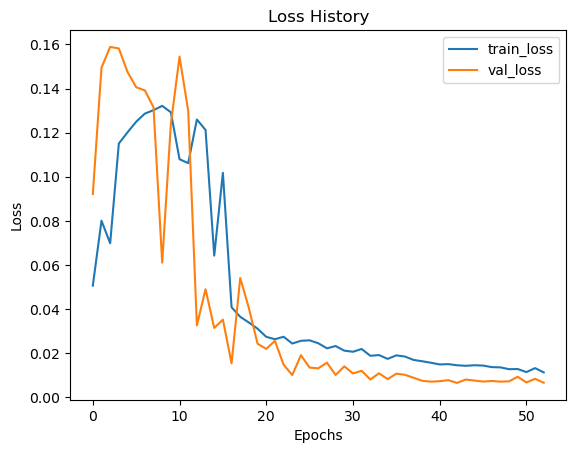

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

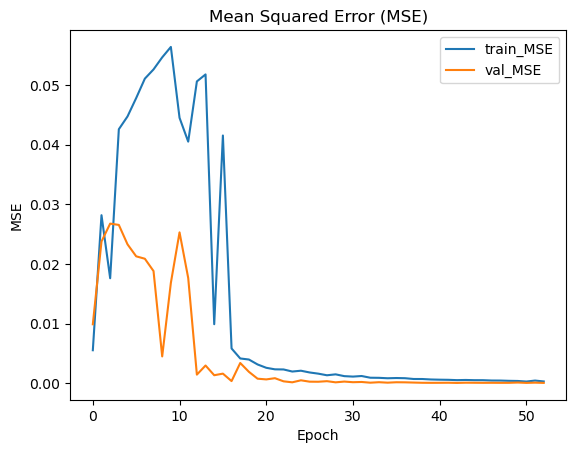

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

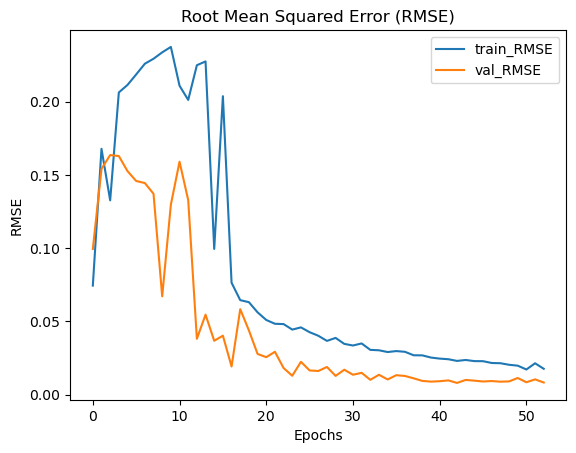

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

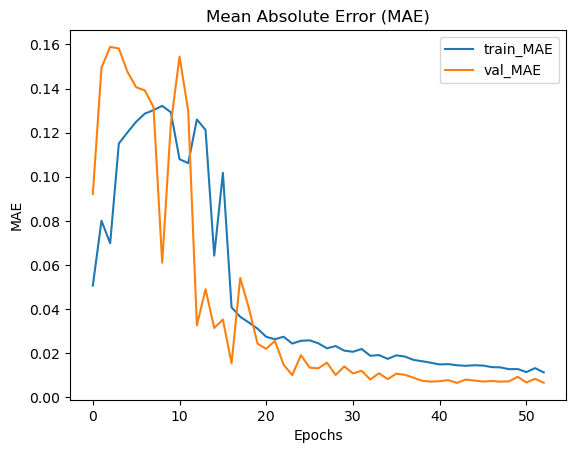

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

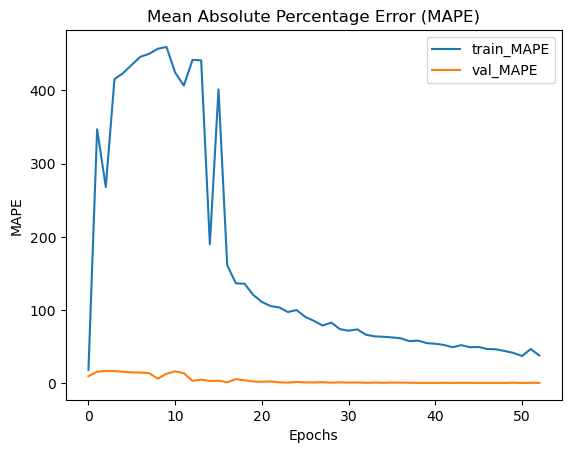

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:07:27.931114: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


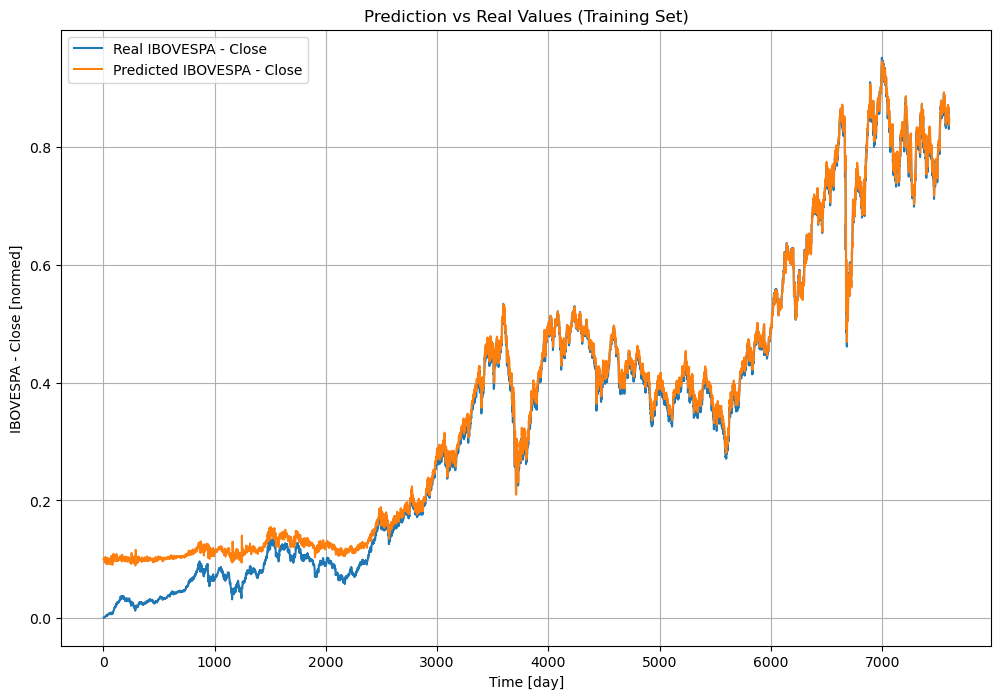

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


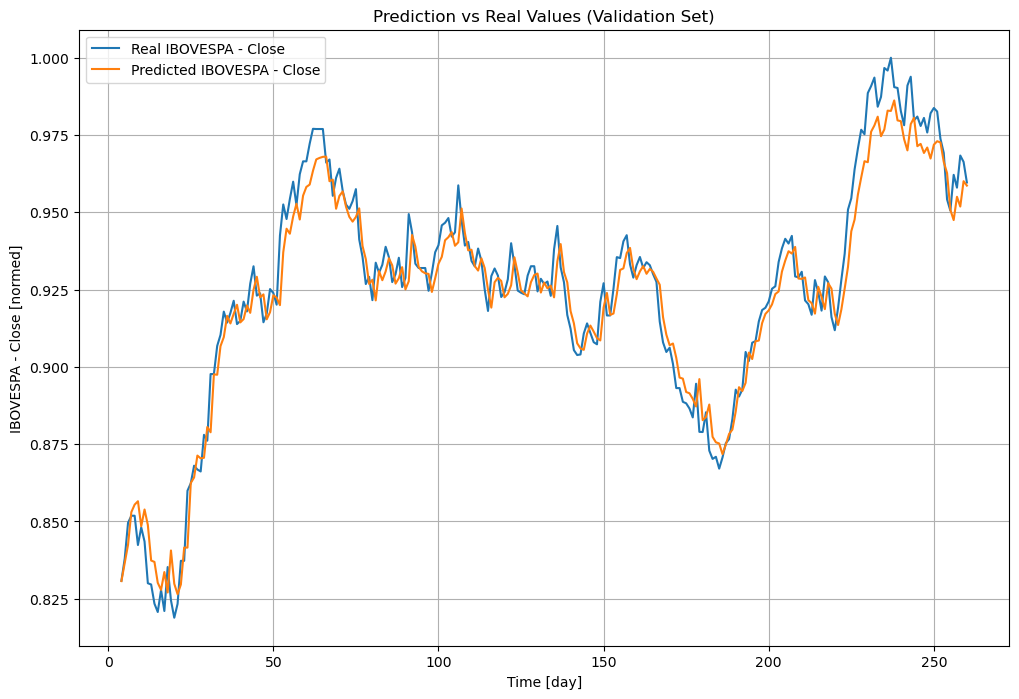

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


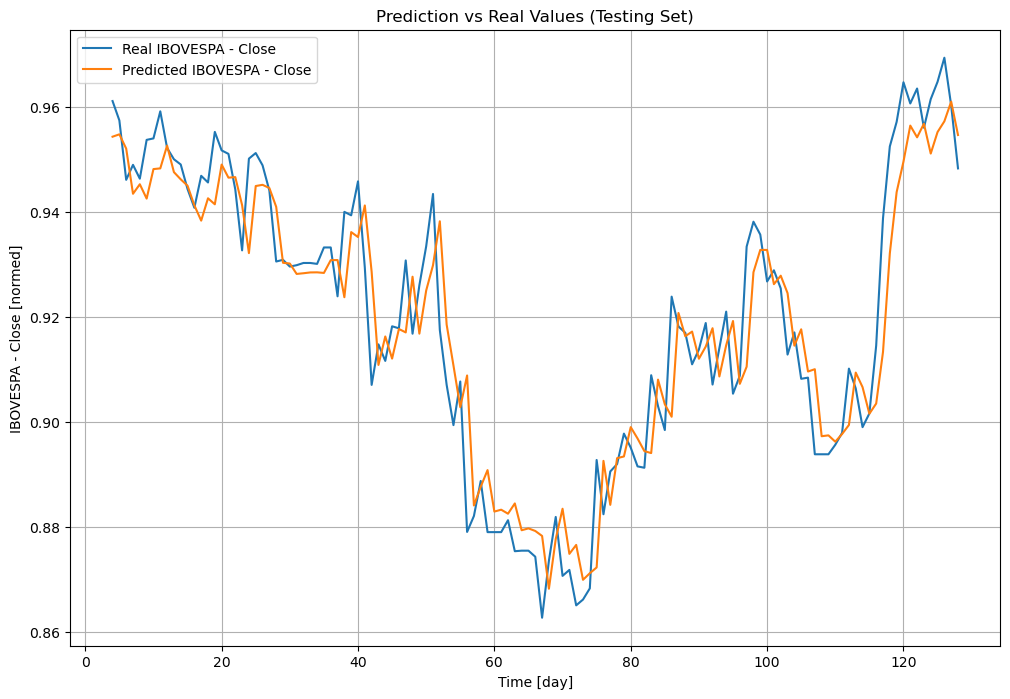

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

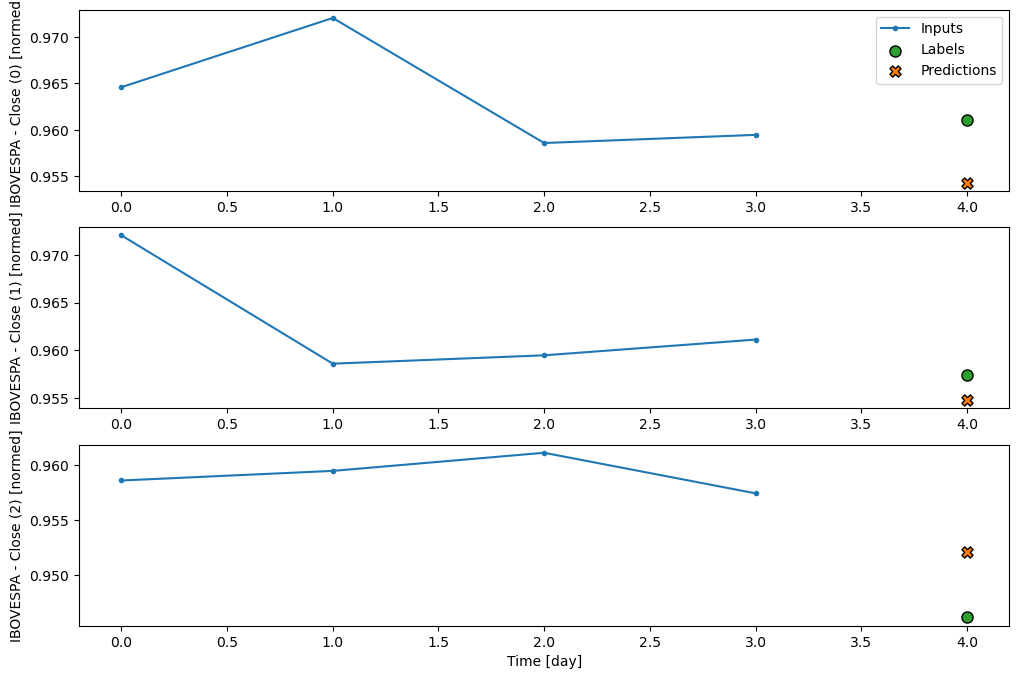

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:38s:771ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


array([[[0.9543221 , 0.9543221 , 0.9543221 , ..., 0.9543221 ,
         0.9543221 , 0.9543221 ]],

       [[0.9547701 , 0.9547701 , 0.9547701 , ..., 0.9547701 ,
         0.9547701 , 0.9547701 ]],

       [[0.9520563 , 0.9520563 , 0.9520563 , ..., 0.9520563 ,
         0.9520563 , 0.9520563 ]],

       ...,

       [[0.9572557 , 0.9572557 , 0.9572557 , ..., 0.9572557 ,
         0.9572557 , 0.9572557 ]],

       [[0.96100414, 0.96100414, 0.96100414, ..., 0.96100414,
         0.96100414, 0.96100414]],

       [[0.9546424 , 0.9546424 , 0.9546424 , ..., 0.9546424 ,
         0.9546424 , 0.9546424 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')